Computer Lab Assignment 6

## Mandelbrot Set

(1) The Mandelbrot set emerges from the super simple iteration formula z(n+1) = z(n)^2 + C, where C is  a  constant  and  one  starts  from  z0=0.  Let  us  assume  all  numbers  are real  for the  moment. For what values of C does this series diverge? To find out, please write a simple loop the computes zn up to nmax=50. Print all zn. If  |zn| exceeds zlimit=50.0 for any n, let us assume the series diverges. For the following C values, determine whether the series diverges or not. (We tried this in class already.)

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
nmax = 50
zlimit = 50.0

c_values = [-4, -2.001, -2, -1.999, -1, 0, 0.5, 1, 2]
series = []

def man(c):

    z = 0
    
    for i in range(0,nmax):
        z = z**2 + c
        if abs(z) >= zlimit:
            return 1
            
        
        
for c in c_values:
    
     series.append(man(c))
     if man(c) == None:
        series.remove(None)
        series.append(0)
        
print(series)


        

[1, 1, 0, 0, 0, 0, 1, 1, 1]


(2) Now we want to convey in the information in this tablein graphical form. Generate a fine grid of C values from –4 to +2 and program a function f(C) that assume 1 or 0 depending on whether the  series zndiverging  or  not.  The  generate  a  plot  f(C)  versus  C. (You  may  not  need  to  write  a function f(C) as long as the plot is correct.Also this will be a somewhat boring graph but it is just a precursor to what is to come.)

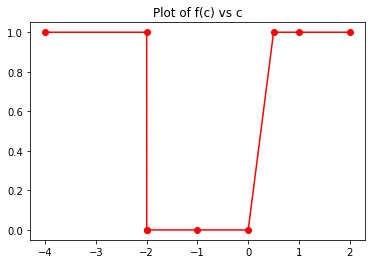

In [76]:
plt.plot(c_values, series, 'ro-')
plt.title('Plot of f(c) vs c')
plt.show()

3) Now make zand C complex variables and repeat step (1). Most likely you will only need to change a single line in your code where define C to C=complex(–0.4,+0.2). The complex abs(z) function is defined to return √re^2+im^2  and can be conveniently used to compare with zlimit.

[(-0.4+0.2j), (0.4+0.6j), -1.7, (-1.7+0.001j), -1.778, (-1.778+0.001j), -1.25, (-1.25+0.04j), (-0.125-0.9j), (-0.125-0.85j)]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0]


/Users/CEE/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


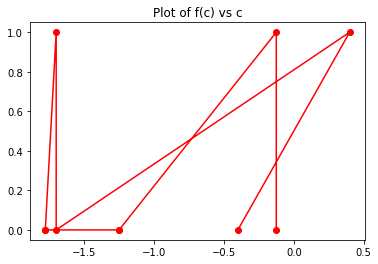

In [79]:
c_values = [complex(-0.4,+0.2),complex(0.4, + 0.6), -1.7, complex(-1.7, + 0.001), -1.778, complex(-1.778, + 0.001), -1.25, complex(-1.25, + 0.04), complex(-0.125, -0.9),complex(-0.125, -0.85)]
print(c_values)


nmax = 50
zlimit = 50.0

series = []

def man(c):
    z = 0
    
    for i in range(0,nmax):
        z = z**2 + c
        if abs(z) >= zlimit:
            return 1
            
        
for c in c_values:
    
     series.append(man(c))
     if man(c) == None:
        series.remove(None)
        series.append(0)
        
print(series)


plt.plot(c_values, series, 'ro-')
plt.title('Plot of f(c) vs c')
plt.show()

(4) Finally, we want to calculate the real Mandelbrot set where we change the real and imaginary parts of C=x+y×i using a fine grid of N points in x and y directions ranging from x=–2.0 to +0.5 and y=–1.25 and +1.25. You may start with N=201. For every point C, start the iteration over zn from z0=0. Define a N×N matrix if fill it with 1 if the series has diverged within the first nmax = 50 steps.  Otherwise  set  the  matrix  element  to  0.  Once  every  matrix  element  has  been  filled,  use imshow to display it.

In [118]:
N = 201
matrix = np.zeros([N,N])
print(np.shape(matrix))

x_range = np.linspace(-2.0, +0.5, N)
y_range = np.linspace(-1.25, +1.25, N)


(201, 201)


In [121]:
c_values = []
for x in x_range:
    for y in y_range:
        
        c = complex(x,y)
        c_values.append(c)
print("len of c values: ", len(c_values))
print("N*N matrix dimensions:", N*N)

len of c values:  40401
N*N matrix dimensions: 40401


In [122]:
nmax = 50
zlimit = 50.0

series = []

def man(c):
    z = 0
    
    for i in range(0,nmax):
        z = z**2 + c
        if abs(z) >= zlimit:
            return 1
            
        
for c in c_values:
    
     series.append(man(c))
     if man(c) == None:
        series.remove(None)
        series.append(0)
        
print(len(series))

40401


In [129]:
series = np.array(series)
series.shape = (N,N)
mandelbrot = series + matrix

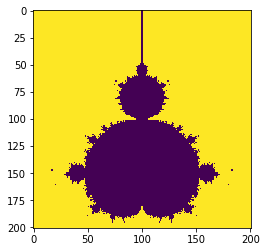

In [130]:
plt.imshow(mandelbrot)

(5) Now we want to make the colors a bit more appealing. In cases, where the series zn does not diverge, fill the matrix with nmax instead of 0. In cases where it diverges at some iteration n<nmax, fill the matrix with n. Does that look better?

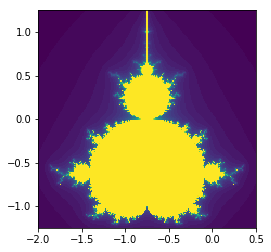

In [138]:
series = []

def man(c):
    z = 0
    
    for n in range(0,nmax):
        z = z**2 + c
        if abs(z) >= zlimit:
            return n
            
        
for c in c_values:
    
     series.append(man(c))
     if man(c) == None:
        series.remove(None)
        series.append(nmax)
        
series = np.array(series)
series.shape = (N,N)
mandelbrot = series + matrix

plt.imshow(mandelbrot,extent=(-2,0.5,-1.25,1.25))

(6) Zoom into the interval –0.8<x<–0.7 and 0.05<y<0.15 and run the code again. 

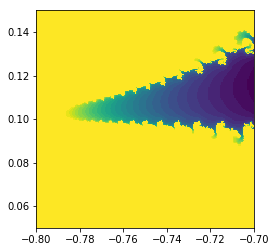

In [144]:
nmax = 50
zlimit = 50.0
N = 201
series = []

matrix = np.zeros([N,N])

x_range = np.linspace(-0.8, -0.7, N)
y_range = np.linspace(0.05, 0.15, N)

def man(c):
    z = 0
    
    for n in range(0,nmax):
        z = z**2 + c
        if abs(z) >= zlimit:
            return n
        
c_values = []
for x in x_range:
    for y in y_range:
        
        c = complex(x,y)
        c_values.append(c)
        
for c in c_values:
    
     series.append(man(c))
     if man(c) == None:
        series.remove(None)
        series.append(nmax)
        
series = np.array(series)
series.shape = (N,N)
mandelbrot = series + matrix

plt.imshow(mandelbrot,extent=(-0.8, -0.7,0.05, 0.15))

Now increase the number of iterations nmax first to 75 and later to 100. What change do you see in the resulting image?

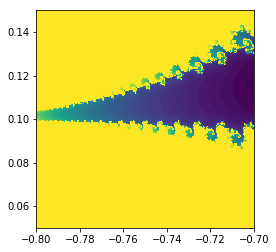

In [145]:
nmax = 75
zlimit = 50.0
N = 201
series = []

matrix = np.zeros([N,N])

x_range = np.linspace(-0.8, -0.7, N)
y_range = np.linspace(0.05, 0.15, N)

def man(c):
    z = 0
    
    for n in range(0,nmax):
        z = z**2 + c
        if abs(z) >= zlimit:
            return n
        
c_values = []
for x in x_range:
    for y in y_range:
        
        c = complex(x,y)
        c_values.append(c)
        
for c in c_values:
    
     series.append(man(c))
     if man(c) == None:
        series.remove(None)
        series.append(nmax)
        
series = np.array(series)
series.shape = (N,N)
mandelbrot = series + matrix

plt.imshow(mandelbrot,extent=(-0.8, -0.7,0.05, 0.15))

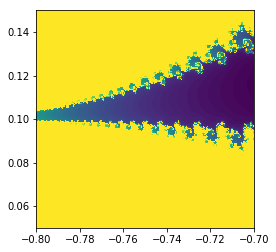

In [146]:
nmax = 100
zlimit = 50.0
N = 201
series = []

matrix = np.zeros([N,N])

x_range = np.linspace(-0.8, -0.7, N)
y_range = np.linspace(0.05, 0.15, N)

def man(c):
    z = 0
    
    for n in range(0,nmax):
        z = z**2 + c
        if abs(z) >= zlimit:
            return n
        
c_values = []
for x in x_range:
    for y in y_range:
        
        c = complex(x,y)
        c_values.append(c)
        
for c in c_values:
    
     series.append(man(c))
     if man(c) == None:
        series.remove(None)
        series.append(nmax)
        
series = np.array(series)
series.shape = (N,N)
mandelbrot = series + matrix

plt.imshow(mandelbrot,extent=(-0.8, -0.7,0.05, 0.15))

(7) Now zoom in further step by step until the size of the x and y intervals are only 0.001 or less. Adjust nmax as needed. Get lost in the neverworld of fractals. Save the image file and the parameters for the most beautiful image you obtained!

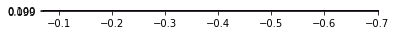

In [151]:
nmax = 100
zlimit = 50.0
N = 201
series = []

matrix = np.zeros([N,N])

x_range = np.linspace(-0.069, -0.7, N)
y_range = np.linspace(0.099, 0.1, N)

def man(c):
    z = 0
    
    for n in range(0,nmax):
        z = z**2 + c
        if abs(z) >= zlimit:
            return n
        
c_values = []
for x in x_range:
    for y in y_range:
        
        c = complex(x,y)
        c_values.append(c)
        
for c in c_values:
    
     series.append(man(c))
     if man(c) == None:
        series.remove(None)
        series.append(nmax)
        
series = np.array(series)
series.shape = (N,N)
mandelbrot = series + matrix

plt.imshow(mandelbrot,extent=(-0.069, -0.7,0.099, 0.1))